## Basic Operations with 1D and 2D NumPy Arrays.

In [11]:
import numpy as np

In [12]:
def basic_operations_on_nd_arrays():
    print(f"1D Array: {arr_1d}")
    print(f"2D Array: {arr_2d}")
    print(f"Sum of 1D Array: {np.sum(arr_1d)}")
    print(f"Mean of 2D Array: {np.mean(arr_2d)}")
    print(f"Transpose of 2D Array: {arr_2d.T}")

In [13]:
# Global Variables
arr_1d = np.array([1,2,3,4,5])
arr_2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

basic_operations_on_nd_arrays()

1D Array: [1 2 3 4 5]
2D Array: [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array: [[1 4 7]
 [2 5 8]
 [3 6 9]]


## Image Processing with NumPy (Indexing & Slicing in Action).

In [14]:
def image_processing_with_numpy():
    image = np.random.randint(0,256, (5,5), dtype = np.uint8)
    print(f"Original Image: {image}")
    cropped_image = image[1:4, 1:4]
    print(f"Cropped Image: {cropped_image}")
    inverted_image = 255 - image
    print(f"Inverted Image: {inverted_image}")

In [15]:
image_processing_with_numpy()

Original Image: [[  2  34  48 223  50]
 [196  94 175  27 130]
 [182  24  74  51 149]
 [113 167 110  33 255]
 [ 60 155 191 182 158]]
Cropped Image: [[ 94 175  27]
 [ 24  74  51]
 [167 110  33]]
Inverted Image: [[253 221 207  32 205]
 [ 59 161  80 228 125]
 [ 73 231 181 204 106]
 [142  88 145 222   0]
 [195 100  64  73  97]]


## Augmented Reality Transformation – Perform linear algebra operations like scaling, rotation, and translation.

In [16]:
import cv2
# Load an image
image = cv2.imread('pexels-iriser.jpg')


Original Image:


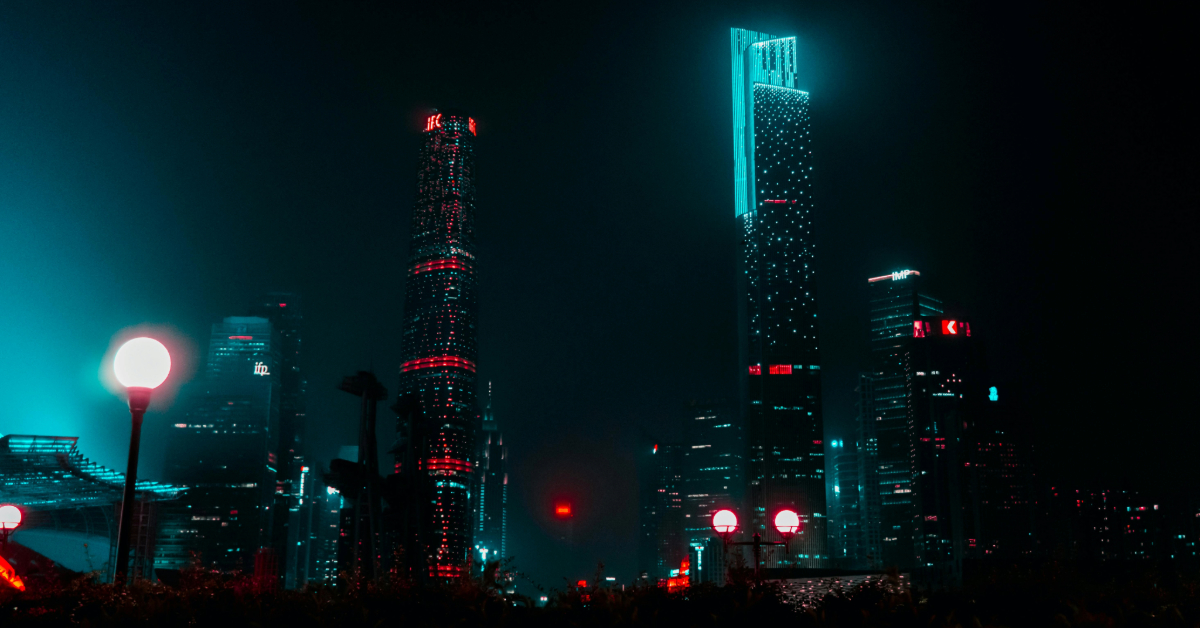

Scaled Image:


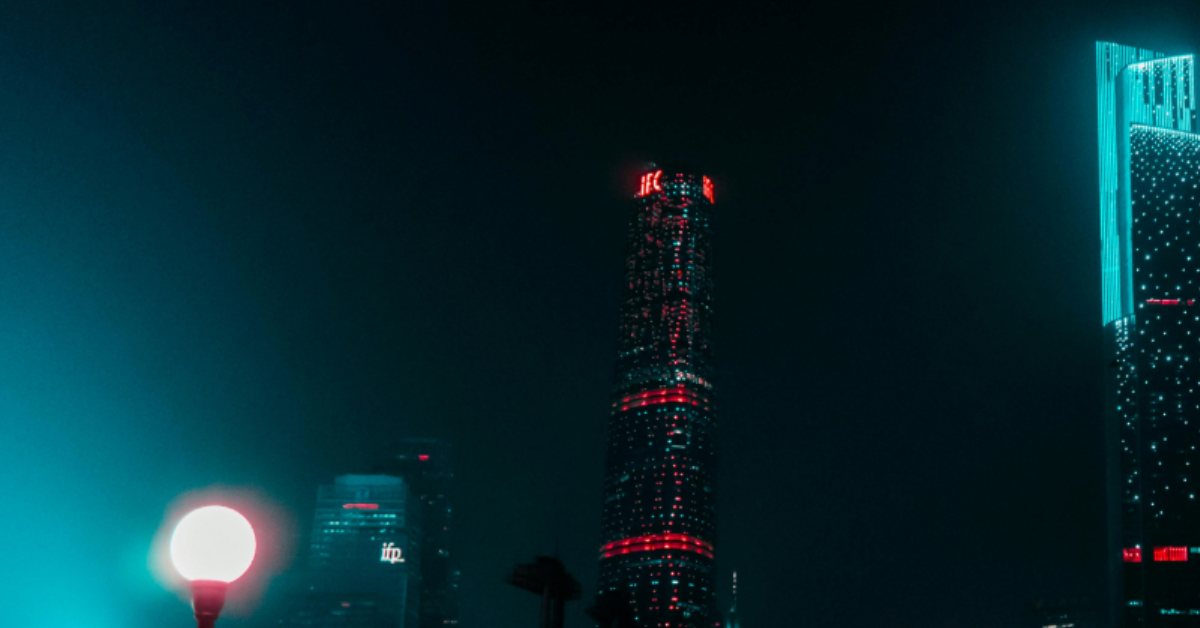

In [17]:
def scale_image(image, scaling_factor):
  scaling_matrix = np.array([[scaling_factor,0,0],[0,scaling_factor,0],[0,0,1]])
  rows, columns = image.shape[:2]
  scaled_image = cv2.warpPerspective(image, scaling_matrix, (columns,rows))
  return scaled_image

from google.colab.patches import cv2_imshow

print("Original Image:")
cv2_imshow(image)
scaled_image = scale_image(image, 1.5)
print("Scaled Image:")
cv2_imshow(scaled_image)

Original Image:


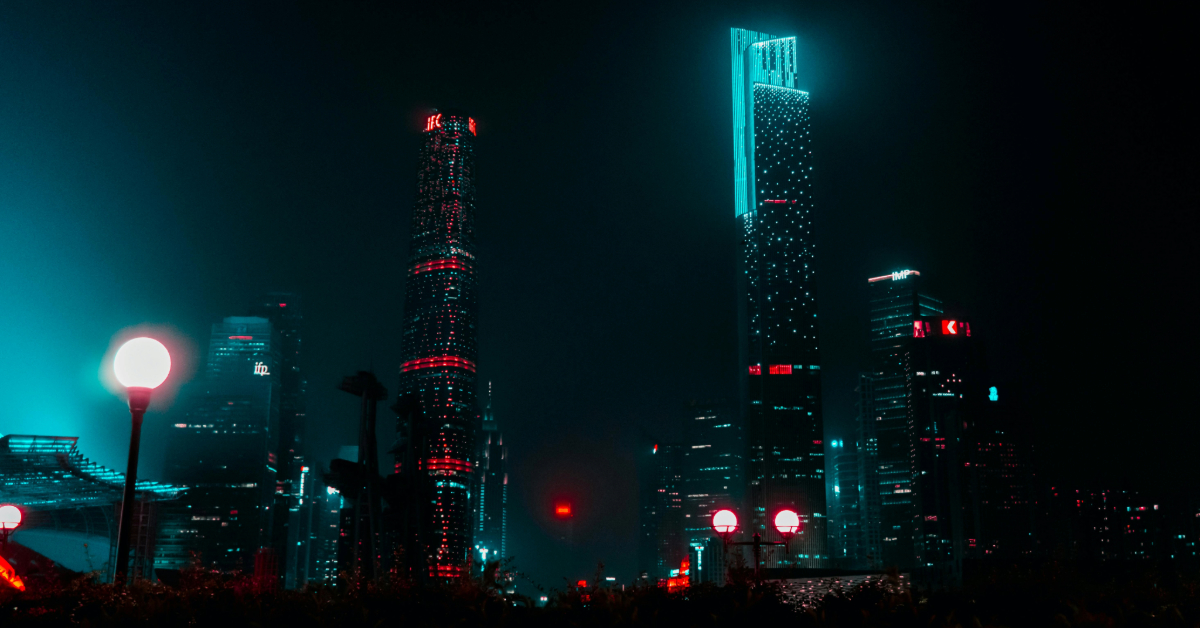

Rotated Image:


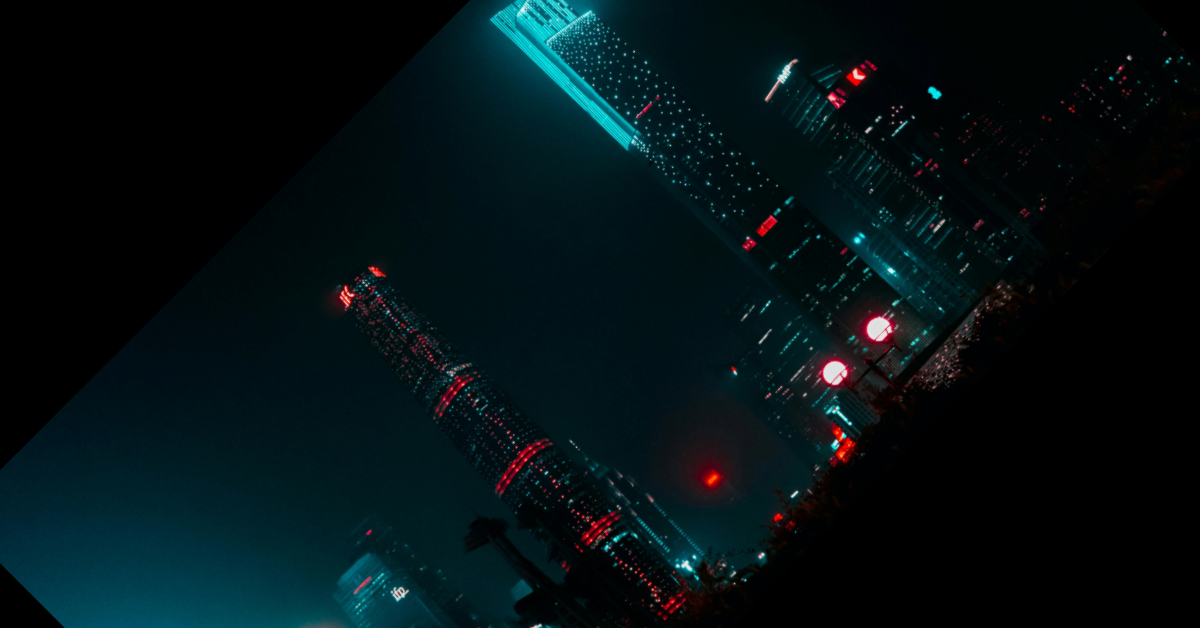

In [18]:
def rotate_image(image, angle):
  rows, columns = image.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((columns/2,rows/2),angle,1)
  rotated_image = cv2.warpAffine(image, rotation_matrix, (columns,rows))
  return rotated_image

print("Original Image:")
cv2_imshow(image)
rotated_image = rotate_image(image, 45)
print("Rotated Image:")
cv2_imshow(rotated_image)

Original Image:


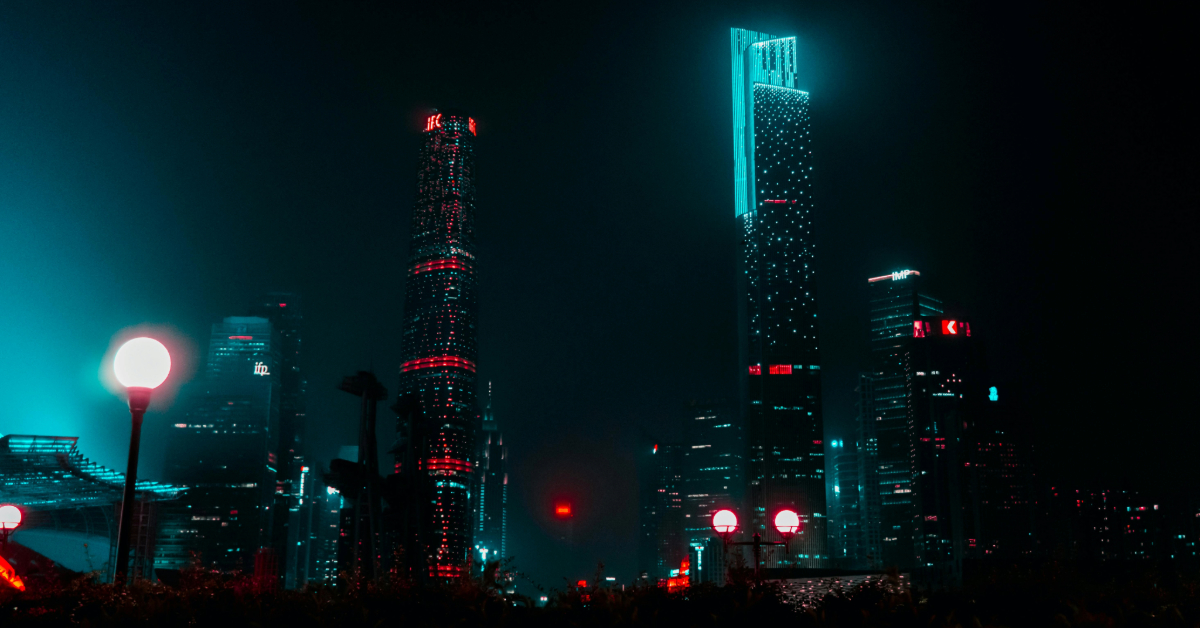

Translated Image:


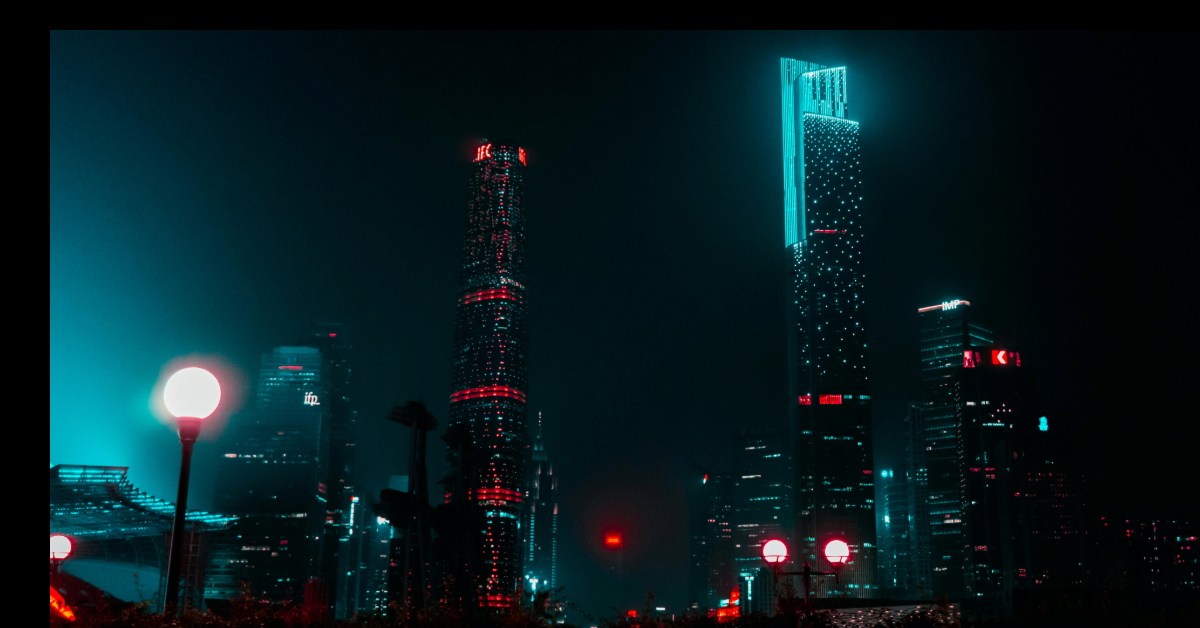

In [19]:
def translate_image(image, tx, ty):
  translation_matrix = np.array([[1,0,tx],[0,1,ty],[0,0,1]],dtype=np.float32)
  rows, columns = image.shape[:2]
  translated_image = cv2.warpPerspective(image, translation_matrix, (columns,rows))
  return translated_image

print("Original Image:")
cv2_imshow(image)
translated_image = translate_image(image, 50, 30)
print("Translated Image:")
cv2_imshow(translated_image)


## Face Detection from Image Arrays – Extract facial features by slicing a NumPy-based image array.

Face Region:


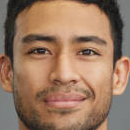

Eye Region:


Eye Region:


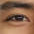

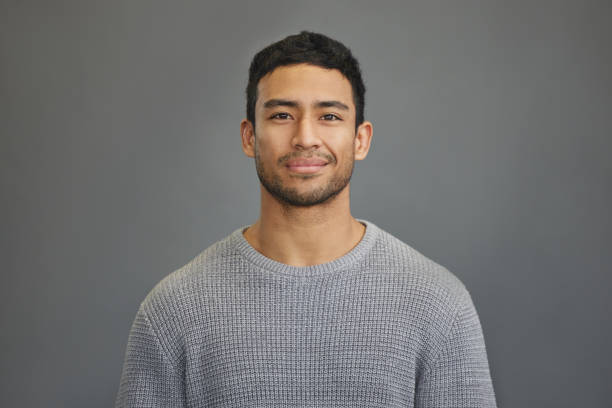

In [20]:
# Load an image and convert it to a NumPy array
image = cv2.imread('istockphoto.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1,minNeighbors=5)

# Loop through the detected faces and extract facial features (regions)
for (x, y, w, h) in faces:
    # Slice the image array to extract the face region
    face_region = image[y:y+h, x:x+w]
    # Optional: Display the face region
    print("Face Region:")
    cv2_imshow(face_region)
    # Extract additional facial features if required (e.g., eyes, nose)
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in eyes:
        eye_region = face_region[ey:ey+eh, ex:ex+ew]
        print("Eye Region:")
        cv2_imshow(eye_region)

# Show the original image with detected faces
cv2_imshow(image)